In [1]:
import os
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
local_path_to_models = r"/Volumes/Ruben/datasets/fetched_raw_imgs_via_api_full/Models"
os.path.exists(local_path_to_models)

True

In [3]:
csv_files_models_path = glob(os.path.join(local_path_to_models, "*",  "*.csv"), recursive=True)
csv_files_models_path

['/Volumes/Ruben/datasets/fetched_raw_imgs_via_api_full/Models/HyperUnet_retrain_no_augmented_corrected_Adam/HyperUnet_retrain_no_augmented_corrected_Adam_history.csv',
 '/Volumes/Ruben/datasets/fetched_raw_imgs_via_api_full/Models/HyperUnet_retrain_augmented_noise_corrected_Adam/HyperUnet_retrain_augmented_noise_corrected_Adam_history.csv']

In [4]:
df = pd.concat([pd.read_csv(fp).assign(model_name=os.path.basename(fp).split(".")[0].replace("_corrected_Adam_history", "").replace("_noise", "")) for fp in csv_files_models_path])
df.head()

,epoch,RootMeanSquaredError,loss,val_RootMeanSquaredError,val_loss,model_name
0,0,0.040413,0.029641,0.033045,0.024702,HyperUnet_retrain_no_augmented
1,1,0.035304,0.025871,0.035552,0.025965,HyperUnet_retrain_no_augmented
2,2,0.034527,0.025274,0.034277,0.025299,HyperUnet_retrain_no_augmented
3,3,0.034069,0.024935,0.033277,0.024465,HyperUnet_retrain_no_augmented
4,4,0.033781,0.024715,0.032919,0.024506,HyperUnet_retrain_no_augmented


In [5]:
# df.pivot( columns= "model_name", values=["RootMeanSquaredError", "val_RootMeanSquaredError", "loss", "val_loss"])
# pd.wide_to_long(df, stubnames="values", i = ['RootMeanSquaredError', 'RootMeanSquaredError'])
# pd.wide_to_long(df, stubnames="values", i = ['RootMeanSquaredError', 'val_RootMeanSquaredError'])
loss_df = pd.melt(df, id_vars=["epoch", 'model_name'], value_vars=['loss', 'val_loss'], var_name='metric', value_name='value')
rsme_df = pd.melt(df, id_vars=["epoch", 'model_name'], value_vars=['RootMeanSquaredError', 'val_RootMeanSquaredError'], var_name='metric', value_name='value')

In [6]:
loss_df.head()

,epoch,model_name,metric,value
0,0,HyperUnet_retrain_no_augmented,loss,0.029641
1,1,HyperUnet_retrain_no_augmented,loss,0.025871
2,2,HyperUnet_retrain_no_augmented,loss,0.025274
3,3,HyperUnet_retrain_no_augmented,loss,0.024935
4,4,HyperUnet_retrain_no_augmented,loss,0.024715


In [7]:
rsme_df.head()

,epoch,model_name,metric,value
0,0,HyperUnet_retrain_no_augmented,RootMeanSquaredError,0.040413
1,1,HyperUnet_retrain_no_augmented,RootMeanSquaredError,0.035304
2,2,HyperUnet_retrain_no_augmented,RootMeanSquaredError,0.034527
3,3,HyperUnet_retrain_no_augmented,RootMeanSquaredError,0.034069
4,4,HyperUnet_retrain_no_augmented,RootMeanSquaredError,0.033781


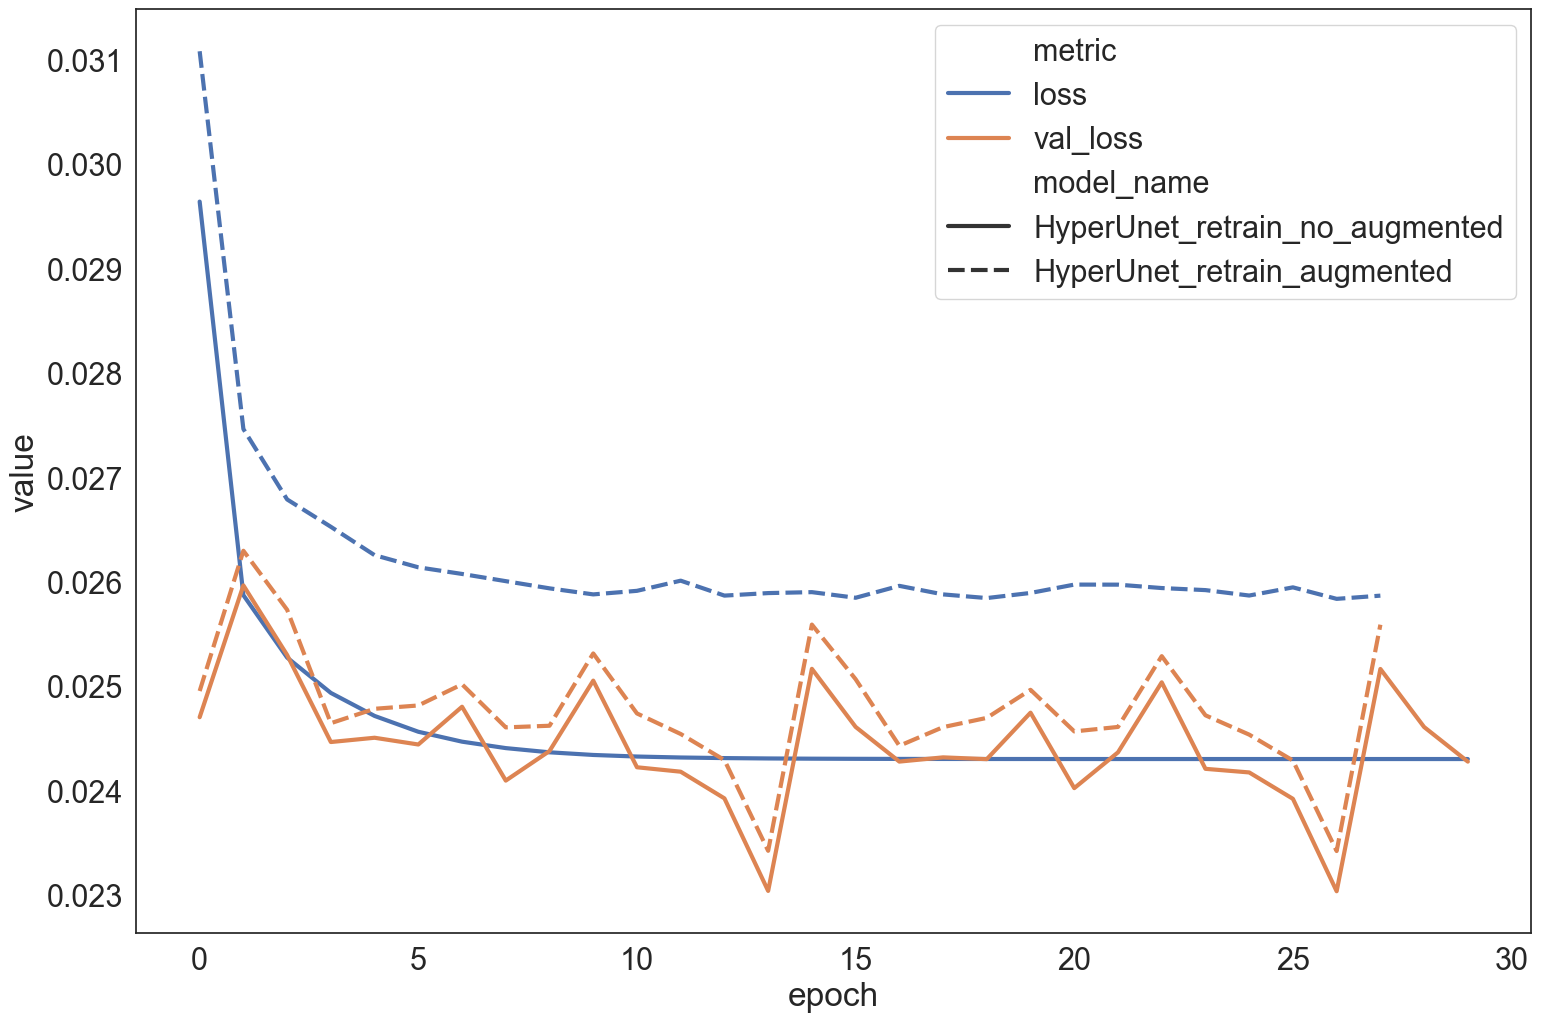

In [27]:
plt.figure(figsize=(18, 12))
swarm_plot = sns.lineplot(x='epoch', y='value', data=loss_df, style='model_name', hue= "metric", linewidth=3)
sns.set_theme(style='white', font_scale=2)
fig = swarm_plot.get_figure()
fig.savefig("loss_plot.png")

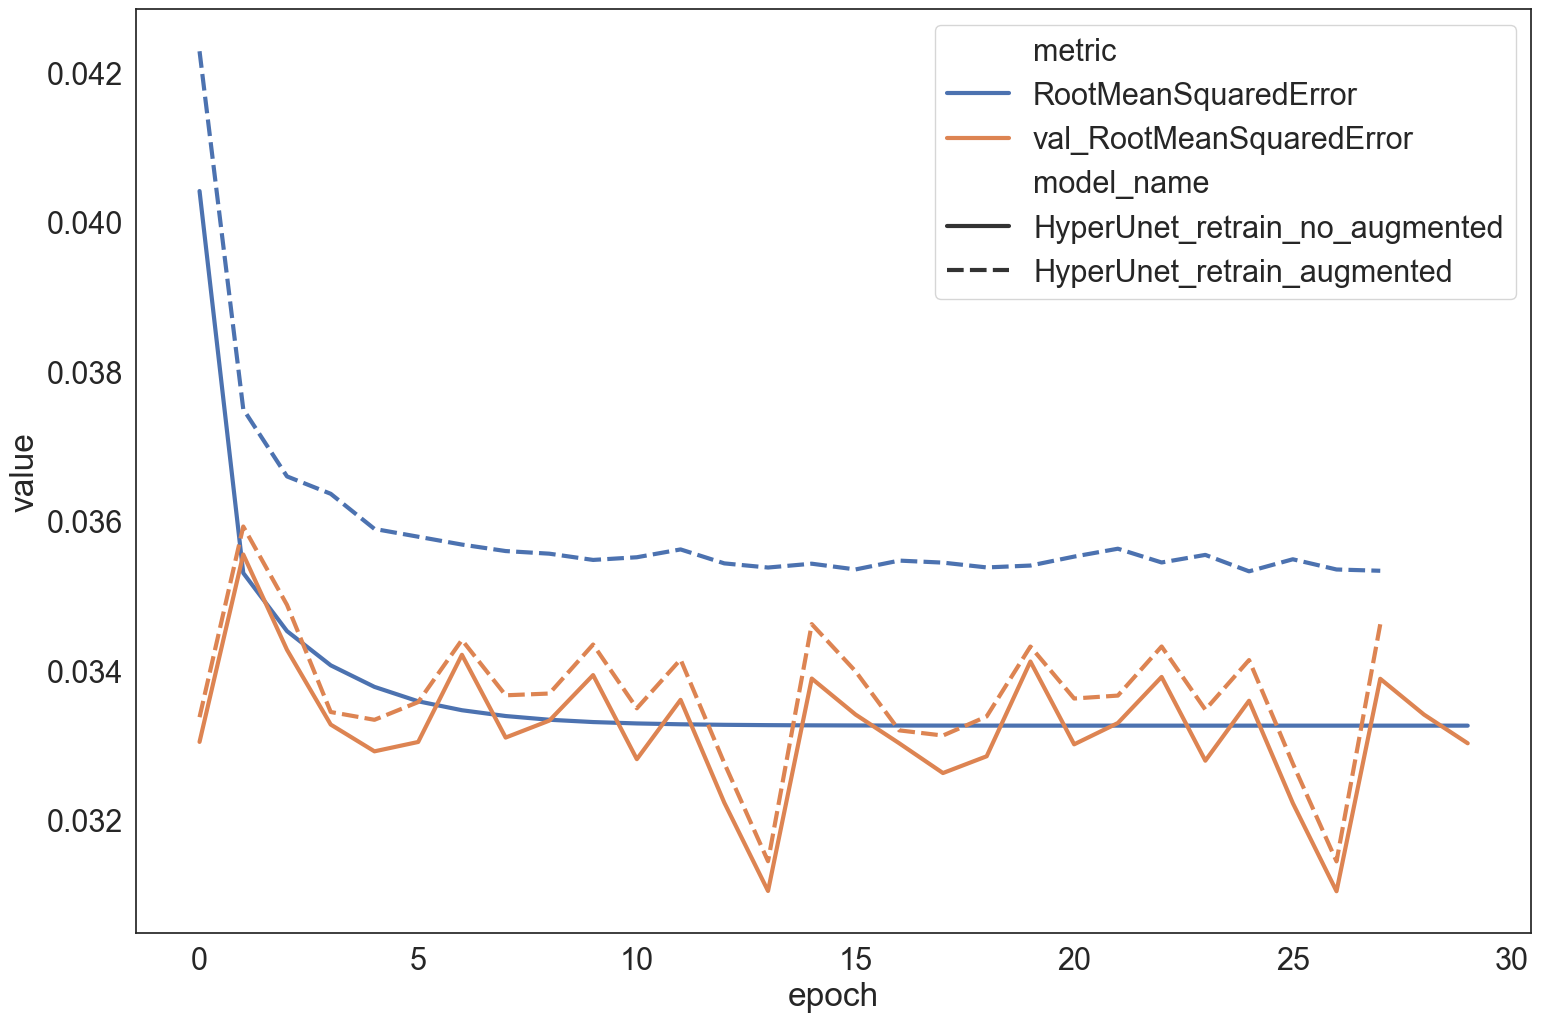

In [28]:
plt.figure(figsize=(18, 12))
swarm_plot = sns.lineplot(x='epoch', y='value', data=rsme_df, style='model_name', hue= "metric", linewidth=3)
sns.set_theme(style='white', font_scale=2)
fig = swarm_plot.get_figure()
fig.savefig("rsme_plot.png")